In [1]:
# The following code will solve 2 optimization problems:
# 1. The minimum flux through orfN gene (while still having biomass synthesis)
# 2. The max flux through orfN gene

In [2]:
# importing PA14 metabolic model of P. aeruginosa
import cobra
model = cobra.io.read_sbml_model("iSD1509MModel.xml")
model

Name,iSDXXXX
Memory address,10410dd60
Number of metabolites,1642
Number of reactions,2021
Number of genes,1510
Number of groups,7
Objective expression,1.0*BIOMASS_PA14_v27M - 1.0*BIOMASS_PA14_v27M_reverse_0dc58
Compartments,"cytosol, extracellular space, periplasm"


In [3]:
default_bounds = {}
for rs in model.reactions:
    default_bounds[rs.id] = rs.bounds
    
# Making resetting model function
def reset_model(model, def_bounds, obj):
    for rs in model.reactions:
        rs.bounds = def_bounds[rs.id]
        
        rs.objective_coefficient
        
        if rs.id == obj:
            rs.objective_coefficient = 1

reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')

In [4]:
# tpiA gene involved in glycolysis
my_gene = model.genes.get_by_id("PA14_62830")
for rxns in my_gene.reactions:
    print(rxns)

TPI: dhap_c <=> g3p_c


In [5]:
# tpiA catalyzed reaction
tpiA_rxn = model.reactions.get_by_id('TPI')
print(f'{tpiA_rxn.id}\t{tpiA_rxn.name}\t{tpiA_rxn.reaction}')

TPI	Triose-phosphate isomerase	dhap_c <=> g3p_c


In [6]:
tpiA = model.genes.PA14_62830
reactions_tpiA = tpiA.reactions
print(tpiA.reactions)

frozenset({<Reaction TPI at 0x13b268670>})


In [7]:
# tpiA bounds
print(f'both bounds: {tpiA_rxn.bounds}') # in mmol/(gdW.hr)
print(tpiA_rxn.summary())

both bounds: (-999999.0, 999999.0)

TPI
===
dhap_c <=> g3p_c
Bounds: -999999.0, 999999.0
Flux: -0.4191



In [8]:
# Checking objective function
for reactions in model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_PA14_v27M


In [9]:
solution = model.optimize()
solution

,fluxes,reduced_costs
1PPDCRc,0.0,-6.820692e-02
2AGPE140tipp,0.0,0.000000e+00
2AGPE141tipp,0.0,0.000000e+00
2AGPG140tipp,0.0,0.000000e+00
2AGPG141tipp,0.0,0.000000e+00
...,...,...
SHGO,0.0,-6.252301e-02
ACTD2_SS,0.0,5.011382e-17
23DHBSpp,0.0,0.000000e+00
ACPS1,0.0,-6.820692e-02


## Maximizing flux through reaction

In [10]:
for rxns in reactions_tpiA:
    #reset model
    reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    
    # Limit growth to minimum of 0.05
    model.reactions.BIOMASS_PA14_v27M.bounds = 0.05, 1000

    # Make rxn of interest the objective function
    model.reactions.BIOMASS_PA14_v27M.objective_coefficient = 0
    rxns.objective_coefficient = 1
    
     # Optimize model to maximize flux through rxn
    max_flux = model.optimize(objective_sense='maximize')
    print(max_flux.objective_value)

-0.01317350334533


In [11]:
max_flux_val = max_flux.objective_value

In [12]:
# # What is growth at max flux through MurA
# growth_rxn_maxflux = model.reactions.get_by_id('BIOMASS_PA14_v27M')
# print(growth_rxn_maxflux.summary())


BIOMASS_PA14_v27M
0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c + 0.0440332489728 pe160_c + 0.0186791573555 pe161_c + 0.0019052207574 pe180_c + 0.0627923456608 pe181_c + 0.0012523828

## Minimizing flux through reaction

In [13]:
for rxns in reactions_tpiA:
    #reset model
    reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    
    # Limit growth to minimum of 0.05
    model.reactions.BIOMASS_PA14_v27M.bounds = 0.05, 1000

    # Make rxn of interest the objective function
    model.reactions.BIOMASS_PA14_v27M.objective_coefficient = 0
    rxns.objective_coefficient = 1
   
    # Optimize model to minimize flux through rxn
    min_flux = model.optimize(objective_sense='minimize')
    print(min_flux.objective_value)
    
min_flux_val = min_flux.objective_value

-51.831471156463174


In [14]:
# # What is growth at min flux through MurA
# growth_rxn_minflux = model.reactions.get_by_id('BIOMASS_PA14_v27M')
# print(growth_rxn_minflux.summary())


BIOMASS_PA14_v27M
0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c + 0.0440332489728 pe160_c + 0.0186791573555 pe161_c + 0.0019052207574 pe180_c + 0.0627923456608 pe181_c + 0.0012523828

In [15]:
# State newly determined bounds for tpiA reaction
min_flux_val, max_flux_val

(-51.831471156463174, -0.01317350334533)

## Perturbations through tpiA Reaction

In [16]:
import numpy as np
import pandas as pd
my_flux_vals = np.linspace(min_flux_val, max_flux_val, num=400)
my_flux_vals

array([-5.18314712e+01, -5.17016007e+01, -5.15717303e+01, -5.14418599e+01,
       -5.13119895e+01, -5.11821191e+01, -5.10522486e+01, -5.09223782e+01,
       -5.07925078e+01, -5.06626374e+01, -5.05327670e+01, -5.04028965e+01,
       -5.02730261e+01, -5.01431557e+01, -5.00132853e+01, -4.98834149e+01,
       -4.97535444e+01, -4.96236740e+01, -4.94938036e+01, -4.93639332e+01,
       -4.92340628e+01, -4.91041923e+01, -4.89743219e+01, -4.88444515e+01,
       -4.87145811e+01, -4.85847107e+01, -4.84548402e+01, -4.83249698e+01,
       -4.81950994e+01, -4.80652290e+01, -4.79353586e+01, -4.78054881e+01,
       -4.76756177e+01, -4.75457473e+01, -4.74158769e+01, -4.72860065e+01,
       -4.71561360e+01, -4.70262656e+01, -4.68963952e+01, -4.67665248e+01,
       -4.66366543e+01, -4.65067839e+01, -4.63769135e+01, -4.62470431e+01,
       -4.61171727e+01, -4.59873022e+01, -4.58574318e+01, -4.57275614e+01,
       -4.55976910e+01, -4.54678206e+01, -4.53379501e+01, -4.52080797e+01,
       -4.50782093e+01, -

In [17]:
# reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
print(model.reactions.BIOMASS_PA14_v27M.objective_coefficient)

tpiA_rxn.bounds = -28.0651843, -28.0651843

# Optimize model to maximize flux through biomass rxn
# with specific flux through tpiA
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.0
-27.237127710531713


In [18]:
# Model flux vector corresponding with this solution
solution.fluxes

1PPDCRc         0.0
2AGPE140tipp    0.0
2AGPE141tipp    0.0
2AGPG140tipp    0.0
2AGPG141tipp    0.0
               ... 
SHGO            0.0
ACTD2_SS        0.0
23DHBSpp        0.0
ACPS1           0.0
ACPpds          0.0
Name: fluxes, Length: 2021, dtype: float64

In [19]:
# Create empty list to input rows for each tpiA flux
row_list = []
# Loop through tpiA fluxes to get corresponding network fluxes
for flux in my_flux_vals:
    # Reset model
    reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set tpiA flux bounds
    tpiA_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    row_list.append(solution.fluxes)

matrix_df = pd.DataFrame(row_list)
matrix_df

,1PPDCRc,2AGPE140tipp,2AGPE141tipp,2AGPG140tipp,2AGPG141tipp,2DHGLCK,2DHGLCNkt_tpp,2HH24DDH1,2MAHMP,3_4DHBZ1t_pp,...,EX_gly_glu__L_e,BIOMASS_PA14_v27M,BIOMASS_PA14_v27M_ANA,PYOO2exNET,AHGDx,SHGO,ACTD2_SS,23DHBSpp,ACPS1,ACPpds
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.054379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.063136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.067515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.588923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.528769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.035846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.542923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

In [20]:
# Importing PCA class from sklearn
from sklearn.decomposition import PCA
# Fit PCA model to matrix
pca = PCA()
pca.fit(matrix_df)

PCA()

In [21]:
# Looking at the principal components formed
components = pca.components_
components

array([[ 1.26715547e-16,  2.71806520e-17,  1.92954105e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.06201309e-16,  4.49842258e-17, -6.28464566e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.10575230e-17,  8.25891005e-17,  8.28872561e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.18422845e-04,  2.09874528e-04,  4.19558272e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.73807290e-02,  1.05445638e-01, -3.03528170e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.81202659e-02, -3.02343835e-02, -9.62389221e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [22]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.44342518e-01 2.53153155e-02 1.66031483e-02 7.37129870e-03
 3.24980072e-03 1.74187821e-03 9.46943740e-04 3.94078163e-04
 2.84620227e-05 4.31987344e-06 2.23311297e-06 3.75813800e-09
 2.07609769e-10 5.17147077e-28 7.56519293e-30 7.36647439e-30
 2.04279844e-30 3.43238951e-31 1.46719739e-31 1.12272125e-31
 8.50781605e-32 7.69329161e-32 5.31777892e-32 3.07877513e-32
 1.85435643e-32 1.21311433e-32 1.09700604e-32 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.09606712e-33 9.09606712e-33 9.09606712e-33
 9.09606712e-33 9.096067

In [24]:
# Keeping only first 3 principial components
pca_2 = PCA(n_components=3)
pca_2.fit(matrix_df)
print(pca_2.explained_variance_ratio_)

# Transform original matrix to principal component space
pca_matrix = pca_2.transform(matrix_df)
print(pca_matrix)
pca_matrix.shape

[0.94434252 0.02531532 0.01660315]
[[109.87523069 -16.16842222  -8.58762697]
 [109.50287023 -16.04563942  -8.34436391]
 [109.13050977 -15.92285662  -8.10110084]
 ...
 [-94.18560447  -8.2086445   58.90832617]
 [-87.77303468 -11.11421469  84.93209932]
 [-83.22854943 -14.88673987 104.50383028]]


(400, 3)

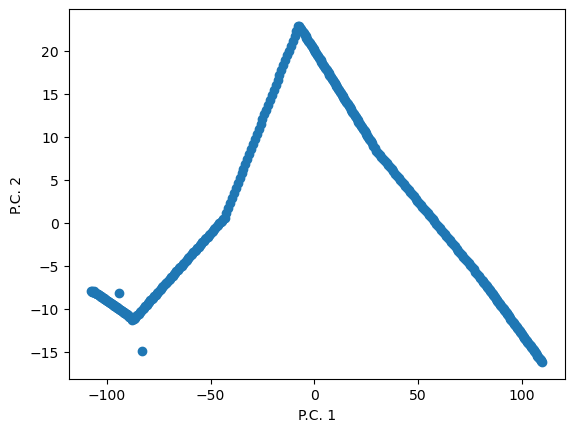

In [25]:
import matplotlib.pyplot as plt

# Graph first two principal components
x = pca_matrix[:, 0]
y = pca_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

## Trying other dimension reduction techniques

In [26]:
# Trying higher order isomap technique
from sklearn.manifold import Isomap
# Create instance of isomap class
isomap = Isomap(n_components=2)
# Fit isomap model to matrix data
isomap.fit(matrix_df)
# Transform matrix to low dimensional space
isomap_matrix = isomap.transform(matrix_df)
isomap_matrix.shape

(400, 2)

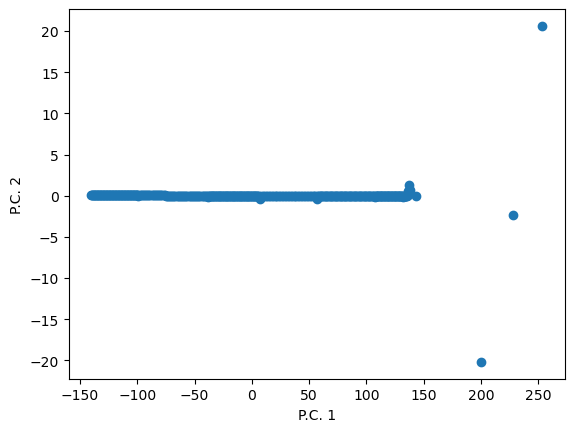

In [27]:
# Graphing isomap matrix dimensions
import matplotlib.pyplot as plt

x = isomap_matrix[:, 0]
y = isomap_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [28]:
# Trying higher order spectral embedding technique
from sklearn.manifold import SpectralEmbedding
# Create instance of spectral embedding class
S_Embed = SpectralEmbedding()
# Fit spectral embedding model to matrix data
S_Embed.fit(matrix_df)
# Transform matrix to low dimensional space
SEmbed_matrix = isomap.transform(matrix_df)
SEmbed_matrix.shape

(400, 2)

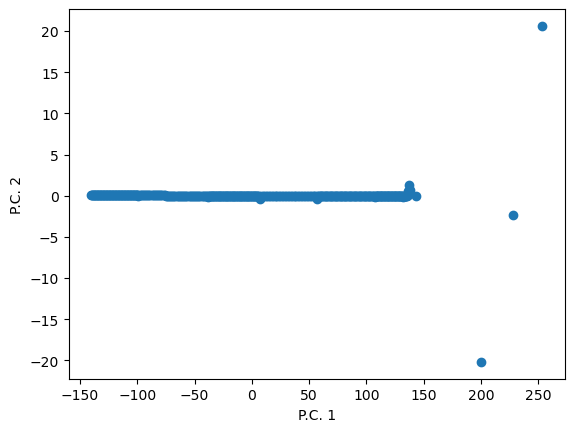

In [29]:
# Graphing spectral embedding - altered matrix
x = SEmbed_matrix[:, 0]
y = SEmbed_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [31]:
# Trying t-SNE high dimensional technique
from sklearn.manifold import TSNE
# Create instance of t-SNE class
tSNE = TSNE()
# Fit and transform matrix to low dimensional space
tSNE_matrix = tSNE.fit_transform(matrix_df)
tSNE_matrix.shape

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 2)

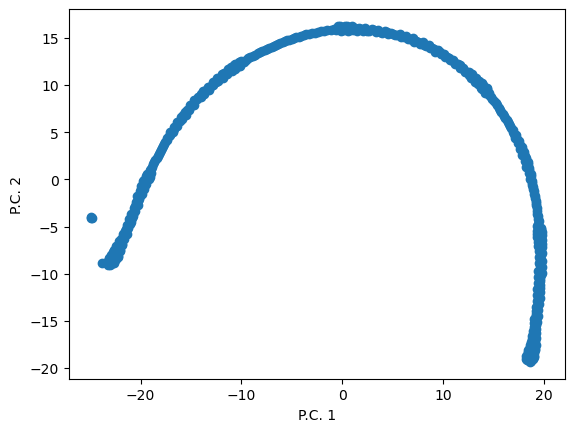

In [32]:
# Graphing tSNE - altered matrix
x = tSNE_matrix[:, 0]
y = tSNE_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()